In [1]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from pycaret.nlp import *
#from pycaret.classification import *
from pycaret.regression import *
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
#df1 = pd.read_csv('data.csv')
#df = pd.read_csv('Kindle_Reviews_latest.csv')
#df1.head(3)

In [2]:
df = pd.read_csv('Kindle_Reviews_Short.csv')

df.head(5)

,Unnamed: 0,overall,reviewerID,asin,reviewText,summary,vote,newReviewTime
0,0,3,A2NPZW0MXZVKPZ,B000FC2S2Q,The movie version of this book is one of my fa...,Not near as good as the movie,2,2016-06-26
1,1,5,A2JSR55IWC7HWO,B000HC48T0,"I enjoy reading this newspaper! It is real, fa...",Five Stars,7,2017-05-04
2,2,4,AR4N9QJ67IG2I,B000JMKQKS,This was very easy to read because it's writte...,Easy to read,2,2016-11-24
3,3,2,A1P00M7SDR84JY,B000JMKQKS,When I found how much I gained form the Jason ...,not as much helpful information as i had hoped...,8,2016-10-06
4,4,5,A3RZKVJ1L7XO6G,B000JMKQKS,Great book. Very informative. Would recommen...,Great book. Very informative and understandable.,2,2016-05-11


In [3]:
df.rename({'overall': 'actual_ratings'}, axis=1, inplace=True)

In [4]:
df.drop(['Unnamed: 0','asin','vote','newReviewTime'], axis=1, inplace=True)

In [5]:
df.drop(['reviewerID'], axis=1, inplace=True)

In [6]:
df.head(3)

,actual_ratings,reviewText,summary
0,3,The movie version of this book is one of my fa...,Not near as good as the movie
1,5,"I enjoy reading this newspaper! It is real, fa...",Five Stars
2,4,This was very easy to read because it's writte...,Easy to read


In [7]:
#Convert a collection of text documents to a matrix of token counts.
#implements both tokenization and occurrence counting in a single class:
tf_vectorizer = CountVectorizer(max_features=800,stop_words={'english'}, ngram_range=(1,1))

In [8]:
features = tf_vectorizer.fit_transform(df['reviewText'].apply(lambda features : np.str_(features)))

In [9]:
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [10]:
#print("Vocabulary: ", tf_vectorizer.vocabulary_)

In [11]:
features_df.head(5)

,10,able,about,absolutely,across,action,actually,add,adult,adventure,after,again,against,age,ago,all,almost,alone,along,alpha,already,also,although,always,am,amazing,amazon,an,and,another,any,anyone,anything,are,aren,around,as,at,attention,attraction,author,authors,away,awesome,baby,back,bad,based,be,beautiful,became,because,become,becomes,been,before,begin,beginning,begins,behind,being,believable,believe,best,better,between,beyond,big,bit,black,body,book,books,boring,both,bought,boy,boyfriend,break,bring,brings,broken,brother,brothers,brought,building,business,but,buy,by,call,called,came,can,cannot,cant,care,case,caught,certainly,chance,change,changed,chapter,chapters,character,characters,check,chemistry,child,children,class,clean,clear,cliffhanger,close,collection,college,come,comes,coming,complete,completely,complex,connection,continue,continues,control,copy,could,couldn,couple,course,cover,crazy,cute,danger,darcy,dark,daughter,day,days,de,dead,deal,death,decided,deep,definitely,depth,description,despite,detail,details,developed,development,dialogue,did,didn,different,difficult,disappointed,do,does,doesn,doesnt,doing,don,done,down,drama,drawn,due,during,each,early,earth,easily,easy,editing,either,elizabeth,else,emotional,emotions,end,ended,ending,ends,enjoy,enjoyable,enjoyed,enough,entertaining,entire,errors,especially,etc,even,events,ever,every,everyone,everything,evil,ex,exactly,excellent,except,exchange,exciting,expect,expected,experience,extremely,eyes,face,fact,fall,family,fan,fantastic,fantasy,far,fast,father,favorite,feel,feeling,feelings,feels,fell,felt,female,few,fiction,fight,figure,filled,finally,find,finding,finds,fine,finish,finished,first,five,follow,food,...,reading,reads,ready,real,realistic,realize,really,reason,received,recipes,recommend,recommended,relationship,relationships,remember,rest,review,reviews,rich,ride,right,romance,romantic,run,running,sad,said,sam,same,save,saw,say,saying,says,scene,scenes,school,science,second,secret,secrets,see,seeing,seem,seemed,seems,seen,sees,self,sense,series,seriously,set,setting,several,sex,sexual,sexy,she,short,should,show,shows,side,simple,simply,since,single,sister,situation,situations,slow,small,smart,so,some,someone,something,sometimes,son,soon,sorry,sort,space,special,spent,spoilers,stand,star,stars,start,started,starts,stay,steamy,step,still,stop,stories,story,storyline,strong,stuff,style,such,super,supposed,sure,surprise,surprised,suspense,sweet,take,taken,takes,taking,tale,talk,talking,team,tell,telling,tells,than,thank,that,the,their,them,themselves,then,there,these,they,thing,things,think,thinking,thinks,third,this,thoroughly,those,though,thought,thoughts,three,through,throughout,time,times,title,to,together,told,too,took,top,totally,town,tried,tries,trouble,true,truly,trust,truth,try,trying,turn,turned,turns,twist,twists,two,type,under,understand,unfortunately,unique,until,up,us,use,used,using,usually,ve,very,view,violence,wait,waiting,want,wanted,wanting,wants,war,was,wasn,way,ways,we,wedding,well,went,were,what,when,where,which,while,who,whole,why,wife,will,wish,with,within,without,woman,women,won,wonderful,word,words,work,worked,working,works,world,worth,would,wouldn,wow,write,writer,writes,writing,written,wrong,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [12]:
new_df = pd.concat([features_df,df['actual_ratings']],axis=1)
new_df.head(5)

,10,able,about,absolutely,across,action,actually,add,adult,adventure,after,again,against,age,ago,all,almost,alone,along,alpha,already,also,although,always,am,amazing,amazon,an,and,another,any,anyone,anything,are,aren,around,as,at,attention,attraction,author,authors,away,awesome,baby,back,bad,based,be,beautiful,became,because,become,becomes,been,before,begin,beginning,begins,behind,being,believable,believe,best,better,between,beyond,big,bit,black,body,book,books,boring,both,bought,boy,boyfriend,break,bring,brings,broken,brother,brothers,brought,building,business,but,buy,by,call,called,came,can,cannot,cant,care,case,caught,certainly,chance,change,changed,chapter,chapters,character,characters,check,chemistry,child,children,class,clean,clear,cliffhanger,close,collection,college,come,comes,coming,complete,completely,complex,connection,continue,continues,control,copy,could,couldn,couple,course,cover,crazy,cute,danger,darcy,dark,daughter,day,days,de,dead,deal,death,decided,deep,definitely,depth,description,despite,detail,details,developed,development,dialogue,did,didn,different,difficult,disappointed,do,does,doesn,doesnt,doing,don,done,down,drama,drawn,due,during,each,early,earth,easily,easy,editing,either,elizabeth,else,emotional,emotions,end,ended,ending,ends,enjoy,enjoyable,enjoyed,enough,entertaining,entire,errors,especially,etc,even,events,ever,every,everyone,everything,evil,ex,exactly,excellent,except,exchange,exciting,expect,expected,experience,extremely,eyes,face,fact,fall,family,fan,fantastic,fantasy,far,fast,father,favorite,feel,feeling,feelings,feels,fell,felt,female,few,fiction,fight,figure,filled,finally,find,finding,finds,fine,finish,finished,first,five,follow,food,...,reads,ready,real,realistic,realize,really,reason,received,recipes,recommend,recommended,relationship,relationships,remember,rest,review,reviews,rich,ride,right,romance,romantic,run,running,sad,said,sam,same,save,saw,say,saying,says,scene,scenes,school,science,second,secret,secrets,see,seeing,seem,seemed,seems,seen,sees,self,sense,series,seriously,set,setting,several,sex,sexual,sexy,she,short,should,show,shows,side,simple,simply,since,single,sister,situation,situations,slow,small,smart,so,some,someone,something,sometimes,son,soon,sorry,sort,space,special,spent,spoilers,stand,star,stars,start,started,starts,stay,steamy,step,still,stop,stories,story,storyline,strong,stuff,style,such,super,supposed,sure,surprise,surprised,suspense,sweet,take,taken,takes,taking,tale,talk,talking,team,tell,telling,tells,than,thank,that,the,their,them,themselves,then,there,these,they,thing,things,think,thinking,thinks,third,this,thoroughly,those,though,thought,thoughts,three,through,throughout,time,times,title,to,together,told,too,took,top,totally,town,tried,tries,trouble,true,truly,trust,truth,try,trying,turn,turned,turns,twist,twists,two,type,under,understand,unfortunately,unique,until,up,us,use,used,using,usually,ve,very,view,violence,wait,waiting,want,wanted,wanting,wants,war,was,wasn,way,ways,we,wedding,well,went,were,what,when,where,which,while,who,whole,why,wife,will,wish,with,within,without,woman,women,won,wonderful,word,words,work,worked,working,works,world,worth,would,wouldn,wow,write,writer,writes,writing,written,wrong,year,years,yes,yet,you,young,your,yourself,actual_ratings
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [13]:
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.75 * len(df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [14]:
numerical_features = list(features_df.columns)
#numerical_features

In [15]:
#the setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.
# 35 k rows 8:04 - 8:09
exp_regr = setup(data = new_train_df, target = 'actual_ratings',numeric_features=numerical_features,session_id=123) 

,Description,Value
0,session_id,123
1,Target,actual_ratings
2,Original Data,"(26661, 801)"
3,Missing Values,False
4,Numeric Features,800
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(18662, 800)"


In [16]:
compare_models() #4 min for 5k rows 35k rows started at 8:09 finished at 8:53

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.6984,0.8249,0.9080,0.5050,0.2396,0.2875,20.1380
lightgbm,Light Gradient Boosting Machine,0.6912,0.8329,0.9124,0.5002,0.2413,0.2887,0.7610
xgboost,Extreme Gradient Boosting,0.7328,0.9177,0.9578,0.4492,0.2507,0.3009,14.4200
et,Extra Trees Regressor,0.7463,0.9810,0.9902,0.4113,0.2592,0.3155,116.2150
rf,Random Forest Regressor,0.7731,1.0330,1.0161,0.3801,0.2660,0.3297,75.4200
gbr,Gradient Boosting Regressor,0.8031,1.0455,1.0222,0.3729,0.2719,0.3486,8.5070
lar,Least Angle Regression,0.8061,1.0463,1.0226,0.3723,0.2686,0.3378,0.2690
br,Bayesian Ridge,0.8083,1.0512,1.0250,0.3694,0.2681,0.3366,2.7450
ridge,Ridge Regression,0.8121,1.0687,1.0336,0.3587,0.2686,0.3335,0.1910
lr,Linear Regression,0.8121,1.0690,1.0337,0.3586,0.2686,0.3335,0.9960


In [17]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7918,1.0126,1.0063,0.3852,0.2677,0.3411
1,0.7923,1.0192,1.0095,0.3635,0.2639,0.3304
2,0.8316,1.1417,1.0685,0.3594,0.2902,0.3843
3,0.7953,1.0125,1.0063,0.3675,0.2624,0.3286
4,0.7738,0.9605,0.9800,0.3818,0.2563,0.3194
5,0.8151,1.0812,1.0398,0.3691,0.2792,0.3630
6,0.8011,1.0343,1.0170,0.3733,0.2700,0.3441
7,0.8080,1.0519,1.0256,0.3841,0.2761,0.3592
8,0.7994,1.0409,1.0202,0.3700,0.2708,0.3451


In [18]:
gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
top_model = compare_models()
# 6 min for 5K rows 35K starting at 8:56

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.6984,0.8249,0.9080,0.5050,0.2396,0.2875,17.7780
lightgbm,Light Gradient Boosting Machine,0.6912,0.8329,0.9124,0.5002,0.2413,0.2887,0.5910
xgboost,Extreme Gradient Boosting,0.7328,0.9177,0.9578,0.4492,0.2507,0.3009,9.5230
et,Extra Trees Regressor,0.7463,0.9810,0.9902,0.4113,0.2592,0.3155,105.0990
rf,Random Forest Regressor,0.7731,1.0330,1.0161,0.3801,0.2660,0.3297,66.4180
gbr,Gradient Boosting Regressor,0.8031,1.0455,1.0222,0.3729,0.2719,0.3486,6.9580
lar,Least Angle Regression,0.8061,1.0463,1.0226,0.3723,0.2686,0.3378,0.2470
br,Bayesian Ridge,0.8083,1.0512,1.0250,0.3694,0.2681,0.3366,2.6170
ridge,Ridge Regression,0.8121,1.0687,1.0336,0.3587,0.2686,0.3335,0.1980
lr,Linear Regression,0.8121,1.0690,1.0337,0.3586,0.2686,0.3335,0.4300


In [20]:
top_model

In [21]:
tuned_model = tune_model(top_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7056,0.8391,0.9160,0.4906,0.2393,0.2852
1,0.7055,0.8611,0.9279,0.4622,0.2384,0.2772
2,0.7381,0.9293,0.9640,0.4786,0.2585,0.3188
3,0.7204,0.8639,0.9294,0.4604,0.2373,0.2773
4,0.6966,0.8082,0.8990,0.4798,0.2301,0.2691
5,0.7216,0.8774,0.9367,0.4880,0.2495,0.3021
6,0.6914,0.8120,0.9011,0.5080,0.2363,0.2795
7,0.7091,0.8437,0.9186,0.5060,0.2430,0.2939
8,0.7088,0.8667,0.9310,0.4754,0.2427,0.2889


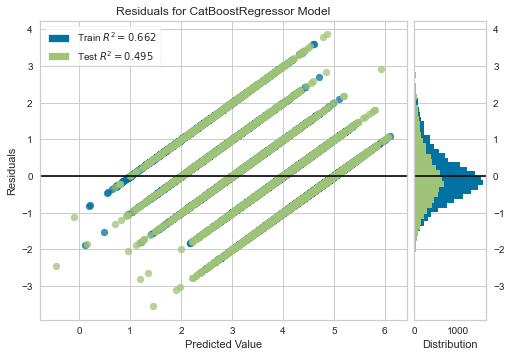

In [22]:
plot_model(tuned_model)

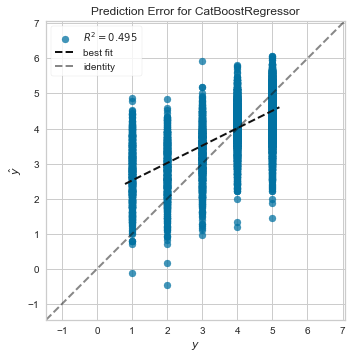

In [23]:
plot_model(tuned_model, plot = 'error')

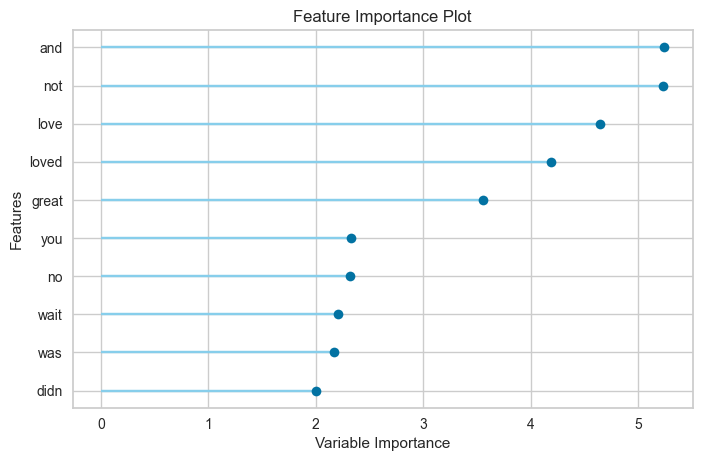

In [24]:
plot_model(tuned_model, plot='feature')

In [25]:
#evaluate_model(tuned_model);

In [26]:
predict_model(tuned_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.7016,0.8551,0.9247,0.4949,0.2444,0.2921


In [27]:
unseen_predictions = predict_model(tuned_model, data=new_test_df)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.7168,0.8769,0.9364,0.4951,0.2478,0.3006


,10,able,about,absolutely,across,action,actually,add,adult,adventure,...,year,years,yes,yet,you,young,your,yourself,actual_ratings,Label
26859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,0,0,5,5.084206
17830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4.460214
201,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4.102633
4408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4.218428
8038,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5.110809


In [28]:
save_model(tuned_model,"deployment_review_to_ratings_04122022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['10', 'able', 'about',
                                                           'absolutely',
                                                           'across', 'action',
                                                           'actually', 'add',
                                                           'adult', 'adventure',
                                                           'after', 'again',
                                                           'against', 'age',
                                                           'ago', 'all',
                                                           'almost', 'alone',
                             

# running below per Colin

In [29]:
model = load_model('deployment_review_to_ratings_04122022')

Transformation Pipeline and Model Successfully Loaded


In [30]:
text = model.steps[0][1].numerical_features

In [31]:
text

['10',
 'able',
 'about',
 'absolutely',
 'across',
 'action',
 'actually',
 'add',
 'adult',
 'adventure',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'all',
 'almost',
 'alone',
 'along',
 'alpha',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'amazon',
 'an',
 'and',
 'another',
 'any',
 'anyone',
 'anything',
 'are',
 'aren',
 'around',
 'as',
 'at',
 'attention',
 'attraction',
 'author',
 'authors',
 'away',
 'awesome',
 'baby',
 'back',
 'bad',
 'based',
 'be',
 'beautiful',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'begin',
 'beginning',
 'begins',
 'behind',
 'being',
 'believable',
 'believe',
 'best',
 'better',
 'between',
 'beyond',
 'big',
 'bit',
 'black',
 'body',
 'book',
 'books',
 'boring',
 'both',
 'bought',
 'boy',
 'boyfriend',
 'break',
 'bring',
 'brings',
 'broken',
 'brother',
 'brothers',
 'brought',
 'building',
 'business',
 'but',
 'buy',
 'by',
 'call',
 'called',
 'came',
 'can',
 'cannot',
 'cant',
 'car

In [84]:
model = load_model('deployment_review_to_ratings_04082022')

Transformation Pipeline and Model Successfully Loaded


In [86]:
prediction =  predict_model(model,data = new_test_df ,round =0)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1,1,1,0,0,0


In [ ]:
cols = ['reviewText']
records = [['This book is very good']]
input_df = pd.DataFrame(data=records,columns=cols)
input_df
12:10
tf_vectorizer = CountVectorizer()
features = tf_vectorizer.fit_transform(input_df['reviewText'].apply(lambda features : np.str_(features)))
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())
12:10
predict_model(estimator = final_model,data=features_df)

In [87]:
cols = ['reviewText']
records = [['This book is very good']]
input_df = pd.DataFrame(data=records,columns=cols)

In [88]:
tf_vectorizer = CountVectorizer()
features = tf_vectorizer.fit_transform(input_df['reviewText'].apply(lambda features : np.str_(features)))
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [ ]:
predict_model(estimator = model,data=new_train_df)

In [122]:
columns_name = list(new_train_df.columns)

In [126]:
new_train_df.shape

(750, 801)

In [123]:
columns_name

['19th',
 '20th',
 'abagnale',
 'able',
 'about',
 'absolutely',
 'academy',
 'account',
 'action',
 'actual',
 'actually',
 'adventure',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'all',
 'allison',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'american',
 'amount',
 'an',
 'and',
 'anita',
 'another',
 'any',
 'anyone',
 'anything',
 'are',
 'argeneau',
 'around',
 'articles',
 'as',
 'at',
 'attention',
 'author',
 'authors',
 'available',
 'away',
 'back',
 'bad',
 'bank',
 'based',
 'battle',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'bed',
 'been',
 'before',
 'begin',
 'beginning',
 'begins',
 'behind',
 'being',
 'believe',
 'bennie',
 'best',
 'better',
 'between',
 'big',
 'birthday',
 'bit',
 'bite',
 'black',
 'bliss',
 'blood',
 'book',
 'books',
 'boring',
 'both',
 'bought',
 'bourgeoisie',
 'brennan',
 'brief',
 'bring',
 'business',
 'but',
 'buy',
 'by',
 'call',
 'came',
 'can',
 'cannot',
 'capital